In [1]:
import os
import tweepy
import pandas as pd
from dotenv import load_dotenv, find_dotenv

env_path = find_dotenv()
load_dotenv(env_path)
bearer_token = os.getenv('BEARER_TOKEN')

In [2]:
client = tweepy.Client(bearer_token=bearer_token)

In [3]:
query = '"iphone 7" lang:pt'
#['word', '"words"', 'word1 OR word2, '@mention', '#hashtag', 'to:account', 'since:year-month-day']
# queries can be 512 characters long

In [4]:
tweets = client.search_recent_tweets(query=query, 
                                     tweet_fields=['author_id','created_at','source','entities'],
                                     max_results=10)

In [5]:
for tweet in tweets.data:
    print(tweet.text)
    print(f"Tweet id : {tweet.id}")
    print(f"Author id : {tweet.author_id}")
    print(f"Date : {tweet.created_at}")
    print(f"Source : {tweet.source}")
    if tweet.entities != None :
        if 'hashtags' in tweet.entities.keys():
            for i in range(len(tweet.entities['hashtags'])):
                hashtags = []
                hashtags.append(tweet.entities['hashtags'][i]['tag'])
            print(f"Hashtags : {hashtags}")
    print('------')

RT @cobbaee: o surto q foi essa live q o sunwoo abriu pra contar pra sra. sohn q o eric tinha quebrado o celular dele, dai o eric entrou em…
Tweet id : 1507070006089195520
Author id : 242810574
Date : 2022-03-24 19:01:04+00:00
Source : Twitter for iPad
------
RT @amiveefarias: mano alguém compra meu iPhone 7 pelo amor de Deus
Tweet id : 1507069258521587713
Author id : 923310293110935553
Date : 2022-03-24 18:58:05+00:00
Source : broot do twitter
------
mano alguém compra meu iPhone 7 pelo amor de Deus
Tweet id : 1507069236845465603
Author id : 1267317936823447553
Date : 2022-03-24 18:58:00+00:00
Source : Twitter for iPhone
------
Vocês são muito folgados pah, na minha época usávamos iPhone 7, aquele bloco mesmo, mas ligávamos, tirávamos foto ali mesmo, fazíamos trabalho.
Agora vocês só querem lamborghini voadora, sabe quanto custa aquilo???
Mimados!
Tweet id : 1507044263745495043
Author id : 1071683025057009665
Date : 2022-03-24 17:18:46+00:00
Source : Twitter for iPhone
------
Tô indec

In [6]:
def hashtag_list(tweet):
    hashtags = []
    if tweet.entities != None :
        if 'hashtags' in tweet.entities.keys():
            for i in range(len(tweet.entities['hashtags'])):
                hashtags.append(tweet.entities['hashtags'][i]['tag'])
    return hashtags

In [7]:
tweets_search = [[],[],[],[],[]]
for tweet in tweets.data :
    tweets_search[0].append(tweet.text)
    tweets_search[1].append(tweet.author_id)
    tweets_search[2].append(tweet.created_at)
    tweets_search[3].append(tweet.source)
    tweets_search[4].append(hashtag_list(tweet))

In [8]:
tweets_search

[['RT @cobbaee: o surto q foi essa live q o sunwoo abriu pra contar pra sra. sohn q o eric tinha quebrado o celular dele, dai o eric entrou em…',
  'RT @amiveefarias: mano alguém compra meu iPhone 7 pelo amor de Deus',
  'mano alguém compra meu iPhone 7 pelo amor de Deus',
  'Vocês são muito folgados pah, na minha época usávamos iPhone 7, aquele bloco mesmo, mas ligávamos, tirávamos foto ali mesmo, fazíamos trabalho.\nAgora vocês só querem lamborghini voadora, sabe quanto custa aquilo???\nMimados!',
  'Tô indecisa se pego o iPhone 7 Plus ou 8 normal 🤦🏽\u200d♀️',
  '@BrbaraQuintao câmera de iphone 7 deixa qualquer um bonito',
  'Se o @Casimiro não for reagir a entrevista do morador de rua mais famoso do Brasil eu sou um iPhone 7',
  'Troca da tela e aplicação de película 3D iPhone 7 Plus (A1784).\n\nAvenida 15 de Novembro, 1182 - Centro, ao lado da Rua São Lourenço - Matão/SP, fone (16)98832-8951.\n\nQuebrou seu smartphone? Sua TV não liga mais? Não consegue jogar seu game preferido? Ve

In [9]:
from thermofeeler.utils import preproc_func

In [10]:
preproc_tweets=[]
for tweet in tweets_search[0]:
    preproc_tweets.append(preproc_func(tweet))

In [11]:
preproc_tweets[0]

['surto',
 'live',
 'sunwoo',
 'abriu',
 'pra',
 'contar',
 'pra',
 'sra',
 'sohn',
 'eric',
 'tinha',
 'quebrado',
 'celular',
 'dai',
 'eric',
 'entrou']

In [12]:
#for tweet in tweepy.Paginator(client.search_recent_tweets, query=query,
#                              tweet_fields=['context_annotations', 'created_at'], max_results=100).flatten(limit=1000):
#    print(tweet)

In [13]:
from datetime import datetime, timedelta
tweets_search = []
now = datetime.now() + timedelta(hours=3)
start_time = now - timedelta(days=7)
end_time = now - timedelta(days=6)

for loop in range(6):
    tweets = client.search_recent_tweets(query=query, 
                                     start_time=start_time,
                                     end_time=end_time,
                                     tweet_fields=['author_id','created_at','source','entities'],
                                     max_results=20)
    tweets_search.append(tweets)
    start_time += timedelta(days=1)
    end_time += timedelta(days=1)

In [14]:
tweets_ = [[],[],[],[],[]]
for tweets in tweets_search:
    for tweet in tweets.data :
        tweets_[0].append(tweet.text)
        tweets_[1].append(tweet.author_id)
        tweets_[2].append(tweet.created_at)
        tweets_[3].append(tweet.source)
        tweets_[4].append(hashtag_list(tweet))

In [15]:
len(tweets_[0])

109

In [16]:
tweets_

[['@guih_th recalque dos iphone 7 da sua bateria de 5kmah... camera deles parecendo de moto g... mais borda do que tela... é duro!',
  '@CoolbusXD @Charlie_taussie O celular q mais durou cmg foi meu iPhone 7+ quase 4 anos de uso diário, esse sim foi guerreiro',
  '@bncria71 KKKKKKKKKKKKKKKKKK iphone 7 no caso né seu pobre',
  'Para quem quiser doar mais e ajudar a ONG que está passando por dificuldades financeiras pode acessar o perfil deles no Instagram: \n\nhttps://t.co/Mm9itJOkPN\n\nUma rifa no valor de R$1 está sendo feita para ajudar no financeiro, com o prêmio de um IPhone 7: https://t.co/1T15NFyDI1',
  'Quero trocar de celular \n\nPego o valor aí divido por 12 e vejo se dá pra pagar, pelo que tô vendo vou ter que trocar de iPhone 7 pro 6 😔😔😔😔😔',
  'Alguém aí tem capinha velha que queira desapegar, do iPhone 7 ou 8 ? Obr amores 🥰',
  'Quem quiser testar, o meu é IPhone 7 🤷🏻\u200d♂️ https://t.co/iG7VR3Kwqc',
  'RT @nelssada: fico com o iphone 7 plus ou pego o redmi note 10 pro? to

In [17]:
import matplotlib.pyplot as plt

In [20]:
import numpy as np
L = np.random.randint(-1,2,len(tweets_[0]))
L = L.tolist()

In [36]:
import seaborn as sns

In [106]:
df = pd.DataFrame(tweets_[2],L).reset_index()
df['date'] = df[0].dt.strftime("%m/%d/%Y")
df = df.drop(columns=[0])

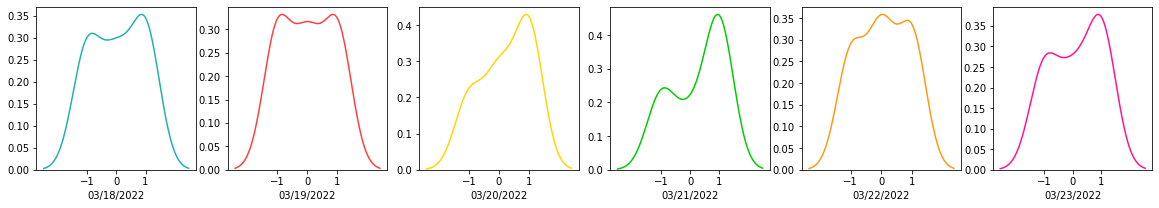

In [101]:
colors = ["#20B2AA","#FF4040","#FFD700","#00CD00","#FF9912", "#FF1493"]

plt.figure(figsize=(20,3))
for i,date,color in zip(range(7), df.date.unique(),colors):
    plt.subplot(1,6,i+1)
    sentiment_day = df[df['date'] == date]['index']
    sns.kdeplot(sentiment_day, color=color)
    plt.xticks([-1,0,1])
    plt.ylabel('')
    plt.xlabel(date);

In [107]:
import datetime

In [109]:
df['date'] = df['date_time_column'].dt.date

KeyError: 0